# Análise dos Acidentes de Autmóveis Ocorridos nas Rodovias Federais Brasileiras no ano de 2022

## Introdução

Este projeto tem o objetivo de reazliar uma análise sobre os acidentes que ocorreram nas rodovias federais brasileiras durante o ano de 2022, a partir dos dados disponibilizados pela Polícia Rodoviária Federal.

Link dos dados: https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf 

Dicionário de Dados:
- id: Variável com valores numéricos, representando o identificador do acidente.
- data_inversa: Data da ocorrência no formato dd/mm/aaaa.
- dia_semana: Dia da semana da ocorrência. Ex.: Segunda, Terça, etc.
- horario: Horário da ocorrência no formato hh:mm:ss.
- uf: Unidade da Federação. Ex.: MG, PE, DF, etc.
- br: Variável com valores numéricos representando o identificador da BR do acidente.
- municipio: Nome do município de ocorrência do acidente.
- causa_acidente: Identificação da causa presumível do acidente. Ex.: Falta de atenção, Velocidade incompatível, etc.
- tipo_acidente: Identificação do tipo de acidente. Ex.: Colisão frontal, Saída de pista, etc.
- classificação_acidente: Classificação quanto à gravidade do acidente: Sem Vítimas, Com Vítimas Feridas, Com Vítimas Fatais e Ignorado.
- fase_dia: Fase do dia no momento do acidente. Ex. Amanhecer, Pleno dia, etc.
- sentido_via: Sentido da via considerando o ponto de colisão: Crescente e decrescente.
- condição_meteorologica: Condição meteorológica no momento do acidente: Céu claro, chuva, vento, etc.
- tipo_pista: Tipo da pista considerando a quantidade de faixas: Dupla,simples ou múltipla.
- tracado_via: Descrição do traçado da via: reta, curva ou cruzamento.
- uso_solo: Descrição sobre as características do local do acidente:Urbano ou rural.
- pessoas: Total de pessoas envolvidas na ocorrência.
- mortos: Total de pessoas mortas envolvidas na ocorrência.
- feridos_leves: Total de pessoas com ferimentos leves envolvidas na ocorrência.
- feridos_graves: Total de pessoas com ferimentos graves envolvidas na ocorrência.
- Ilesos: Total de pessoas ilesas envolvidas na ocorrência.
- Ignorados: Total de pessoas envolvidas na ocorrência e que não se soube o estado físico.
- feridos: Total de pessoas feridas envolvidas na ocorrência (é a soma dos feridos leves com os graves).
- veiculos: Total de veículos envolvidos na ocorrência.

Perguntas de negócio a serem respondidas com relação a acidentes em geral:
- Quais tipos de acidentes mais ocorreram?
- Em quais rodovias ocorreram o maior número de acidentes?
- Quais estados tiverem o maior número de acidentes?
- Em qual mês do ano ocorreu o maior número de acidentes?
- Qual dia e horário da semana ocorrem a maior parte dos acidentes?
- Quais causas geraram maior número de acidentes?
- Sob quais condições climáticas ocorrem a maioria dos acidentes?
- Sob quais tipos de pista ocorrem a maioria dos acidentes?

Perguntas de negócio a serem respondidas com relação a acidentes com vítimas fatais:
- Qual a porcentagem de mortos com relação ao número de pessoas acidentadas?
- Quais tipos de acidentes com vítimas fatais mais ocorreram?
- Em quais rodovias ocorreram o maior número de acidentes com vítimas fatais?
- Quais estados tiveram o maior número de acidentes com vítimas fatais?
- Em qual mês do ano ocorreu o maior número de acidentes com vítimas fatais?
- Qual dia e horário da semana ocorrem a maior parte dos acidentes com vítimias fatais?
- Quais causas geraram maior número de acidentes com vítimias fatais?

## Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)
sns.set_style('darkgrid')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Funçção para definir uma nova largura para as barras dos gráficos
def Width(ax, new_width) :
    for patch in ax.patches :
        current_width = patch.get_width()
        difference = current_width - new_width

        # Define nova largura
        patch.set_width(new_width)

        # Recentraliza as barras
        patch.set_x(patch.get_x() + difference * .5)

# Função para definir uma nova altura para as barras dos gráficos
def Height(ax, new_height) :
    for patch in ax.patches :
        current_height = patch.get_height()
        difference = current_height - new_height

        # Define nova largura
        patch.set_height(new_height)

        # Recentraliza as barras
        patch.set_x(patch.get_x() + difference * .5)

## Carregando o Dataset e Conhecendo os Dados

In [3]:
df = pd.read_csv('dataset/datatran2022.csv', sep=';', encoding='iso-8859-1')
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,405151,2022-01-01,sábado,01:35:00,PI,316.0,415,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,"-7,43280012","-40,68261908",SPRF-PI,DEL04-PI,UOP03-DEL04-PI
1,405158,2022-01-01,sábado,02:40:00,PR,116.0,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,2,1,1,0,0,0,1,1,"-25,114403","-48,8467554",SPRF-PR,DEL01-PR,UOP02-DEL01-PR
2,405172,2022-01-01,sábado,05:22:00,MS,163.0,393,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Simples,Não Informado,Não,2,0,1,0,1,0,1,2,"-21,228445","-54,456296",SPRF-MS,DEL02-MS,UOP01-DEL02-MS
3,405203,2022-01-01,sábado,07:00:00,RJ,101.0,457,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Curva,Sim,2,0,0,1,1,0,1,2,"-23,03149804","-44,17715297",SPRF-RJ,DEL03-RJ,UOP02-DEL03-RJ
4,405207,2022-01-01,sábado,09:00:00,MG,40.0,"508,3",RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,Sem Vítimas,Pleno dia,Decrescente,Chuva,Dupla,Reta,Sim,3,0,0,0,3,0,0,1,"-19,76061249","-44,1347544",SPRF-MG,DEL02-MG,UOP01-DEL02-MG


In [4]:
df.shape

(64547, 30)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64547 entries, 0 to 64546
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      64547 non-null  int64  
 1   data_inversa            64547 non-null  object 
 2   dia_semana              64547 non-null  object 
 3   horario                 64547 non-null  object 
 4   uf                      64547 non-null  object 
 5   br                      64350 non-null  float64
 6   km                      64350 non-null  object 
 7   municipio               64547 non-null  object 
 8   causa_acidente          64547 non-null  object 
 9   tipo_acidente           64547 non-null  object 
 10  classificacao_acidente  64547 non-null  object 
 11  fase_dia                64547 non-null  object 
 12  sentido_via             64547 non-null  object 
 13  condicao_metereologica  64547 non-null  object 
 14  tipo_pista              64547 non-null

Já podemos perceber que possuímos variáveis com valores missing.

In [6]:
# Funções Gerais
total_accidents = df.shape[0]
total_deaths = df['mortos'].sum()
total_accidents_people = df['pessoas'].sum()
list_months = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setebmbro', 'Outubro', 'Novemro', 'Dezembro']

## Pre-Processando os Dados

### Tratando valores missing

In [7]:
## Verificando o número de valores missing em cada variável
df.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        197
km                        197
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    3
delegacia                 759
uop                        48
dtype: int64

Como não vamos utilizar as variáveis "regional", "delegacia" e "uop" para responder as perguntas de negócio, estas variáveis serão excluídas do dataset.

In [8]:
# Excluindo variáveis com valores missing que não utilizaremos
df = df.drop(['regional', 'delegacia', 'uop'], axis=1)
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
0,405151,2022-01-01,sábado,01:35:00,PI,316.0,415,MARCOLANDIA,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,"-7,43280012","-40,68261908"
1,405158,2022-01-01,sábado,02:40:00,PR,116.0,33,CAMPINA GRANDE DO SUL,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,2,1,1,0,0,0,1,1,"-25,114403","-48,8467554"
2,405172,2022-01-01,sábado,05:22:00,MS,163.0,393,NOVA ALVORADA DO SUL,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Simples,Não Informado,Não,2,0,1,0,1,0,1,2,"-21,228445","-54,456296"
3,405203,2022-01-01,sábado,07:00:00,RJ,101.0,457,ANGRA DOS REIS,Reação tardia ou ineficiente do condutor,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Curva,Sim,2,0,0,1,1,0,1,2,"-23,03149804","-44,17715297"
4,405207,2022-01-01,sábado,09:00:00,MG,40.0,"508,3",RIBEIRAO DAS NEVES,Acumulo de água sobre o pavimento,Saída de leito carroçável,Sem Vítimas,Pleno dia,Decrescente,Chuva,Dupla,Reta,Sim,3,0,0,0,3,0,0,1,"-19,76061249","-44,1347544"


In [9]:
# Tratando os valores da variável "br"

## Quantas brs existem por estado?
df.groupby('uf')['br'].unique()

uf
AC                                  [364.0, 317.0, nan]
AL    [423.0, 101.0, 316.0, 110.0, 104.0, 424.0, 416...
AM                    [174.0, 319.0, 230.0, 317.0, nan]
AP                                  [210.0, 156.0, nan]
BA    [101.0, 116.0, 367.0, 242.0, 324.0, 407.0, 110...
CE    [116.0, 20.0, 222.0, 402.0, 304.0, 226.0, nan,...
DF           [60.0, 251.0, 20.0, 40.0, 80.0, 70.0, nan]
ES    [101.0, 262.0, 447.0, 259.0, 482.0, 393.0, nan...
GO    [60.0, 153.0, 414.0, 20.0, 364.0, 70.0, 452.0,...
MA    [316.0, 135.0, 222.0, 10.0, 230.0, 226.0, 402....
MG    [40.0, 365.0, 116.0, 381.0, 146.0, 50.0, 262.0...
MS    [163.0, 262.0, 376.0, 359.0, 158.0, nan, 419.0...
MT              [70.0, 364.0, 158.0, 163.0, 174.0, nan]
PA    [10.0, 163.0, 230.0, 316.0, 155.0, 222.0, 308....
PB    [116.0, 230.0, 101.0, 361.0, nan, 405.0, 412.0...
PE    [423.0, 116.0, 232.0, 101.0, 428.0, 424.0, 408...
PI    [316.0, 343.0, 135.0, 407.0, 402.0, 230.0, 222...
PR    [116.0, 153.0, 277.0, 369.0, 376.0, 163

In [10]:
# Verificando a porcentagem de valores missing nas variáveis
df.isnull().sum()/df.shape[0]*100

id                        0.000000
data_inversa              0.000000
dia_semana                0.000000
horario                   0.000000
uf                        0.000000
br                        0.305204
km                        0.305204
municipio                 0.000000
causa_acidente            0.000000
tipo_acidente             0.000000
classificacao_acidente    0.000000
fase_dia                  0.000000
sentido_via               0.000000
condicao_metereologica    0.000000
tipo_pista                0.000000
tracado_via               0.000000
uso_solo                  0.000000
pessoas                   0.000000
mortos                    0.000000
feridos_leves             0.000000
feridos_graves            0.000000
ilesos                    0.000000
ignorados                 0.000000
feridos                   0.000000
veiculos                  0.000000
latitude                  0.000000
longitude                 0.000000
dtype: float64

Ao analisar as rodovias federais por cada estado, percebemos que todos os valores NaN se localizam em estados onde existem mais de uma rodovia federal. Caso existisse apenas uma rodovia federal por estado, poderia optar por preencher o valor missing com o seu valor.

Como a porcentagem de valores missing das duas variáveis é baixo, 0.30%, vamos excluir estes registros, pois pouco irá interferir nos resultado final de nossa análise.

In [11]:
# Removendo registros missing 
df.dropna(inplace = True, axis=0)

In [12]:
df.shape

(64350, 27)

In [13]:
df.isnull().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
feridos                   0
veiculos                  0
latitude                  0
longitude                 0
dtype: int64

In [14]:
# Deixando a variável "municipio" dentro do padrão
municipio = []

for i in df['municipio']:
    municipio_0 = i[0].upper()
    municipio_1 = i[1:].lower()
    municipio.append(municipio_0 + municipio_1)
    
df['municipio'] = municipio

In [15]:
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
0,405151,2022-01-01,sábado,01:35:00,PI,316.0,415,Marcolandia,Ingestão de álcool pelo condutor,Colisão traseira,Com Vítimas Feridas,Plena Noite,Decrescente,Nublado,Simples,Reta,Sim,2,0,1,0,1,0,1,2,"-7,43280012","-40,68261908"
1,405158,2022-01-01,sábado,02:40:00,PR,116.0,33,Campina grande do sul,Ingestão de álcool pelo condutor,Tombamento,Com Vítimas Fatais,Pleno dia,Decrescente,Nublado,Dupla,Curva,Não,2,1,1,0,0,0,1,1,"-25,114403","-48,8467554"
2,405172,2022-01-01,sábado,05:22:00,MS,163.0,393,Nova alvorada do sul,Condutor deixou de manter distância do veículo...,Colisão traseira,Com Vítimas Feridas,Amanhecer,Decrescente,Céu Claro,Simples,Não Informado,Não,2,0,1,0,1,0,1,2,"-21,228445","-54,456296"
3,405203,2022-01-01,sábado,07:00:00,RJ,101.0,457,Angra dos reis,Reação tardia ou ineficiente do condutor,Colisão frontal,Com Vítimas Feridas,Pleno dia,Decrescente,Chuva,Simples,Curva,Sim,2,0,0,1,1,0,1,2,"-23,03149804","-44,17715297"
4,405207,2022-01-01,sábado,09:00:00,MG,40.0,"508,3",Ribeirao das neves,Acumulo de água sobre o pavimento,Saída de leito carroçável,Sem Vítimas,Pleno dia,Decrescente,Chuva,Dupla,Reta,Sim,3,0,0,0,3,0,0,1,"-19,76061249","-44,1347544"


In [16]:
# Alterando a formatação da variável "br"
df = df.astype({"br": 'str'})

br = []
for i in df['br']:
    br_split = i.split('.')
    br.append('BR' + br_split[0])

df['br'] = br

In [17]:
# Formatando a data no dataset
df['data_inversa'] = pd.to_datetime(df['data_inversa'], errors='coerce')

df['ano'] = df['data_inversa'].dt.year 
df['mes'] = df['data_inversa'].dt.month
df['dia'] = df['data_inversa'].dt.day


In [18]:
# Excluindo as variáveis latitude e longitude, pois não seráo úteis para nós
df = df.drop(['latitude', 'longitude'], axis=1)

In [19]:
df.sample(5)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,ano,mes,dia
10538,469780,2022-08-23,terça-feira,07:20:00,PR,BR376,"177,4",Maringa,Ausência de reação do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Múltipla,Reta,Sim,2,0,0,1,1,0,1,2,2022,8,23
22988,416704,2022-02-23,quarta-feira,18:00:00,SC,BR101,159,Porto belo,Demais falhas mecânicas ou elétricas,Tombamento,Com Vítimas Feridas,Anoitecer,Crescente,Céu Claro,Dupla,Reta,Não,2,0,2,0,0,0,2,1,2022,2,23
52593,479403,2022-10-08,sábado,12:10:00,SP,BR116,203,Aruja,Ausência de reação do condutor,Colisão traseira,Com Vítimas Feridas,Pleno dia,Decrescente,Céu Claro,Múltipla,Não Informado,Sim,3,0,1,0,2,0,1,2,2022,10,8
20810,412889,2022-01-13,quinta-feira,14:10:00,MG,BR381,"524,4",Brumadinho,Ausência de reação do condutor,Colisão com objeto,Com Vítimas Feridas,Pleno dia,Crescente,Céu Claro,Dupla,Curva,Não,1,0,0,1,0,0,1,1,2022,1,13
5503,448248,2022-05-07,sábado,06:00:00,MG,BR365,495,Patrocinio,Reação tardia ou ineficiente do condutor,Colisão frontal,Com Vítimas Feridas,Amanhecer,Decrescente,Sol,Simples,Curva,Não,3,0,0,1,1,1,1,2,2022,5,7


## Respondendo as Perguntas de Negócio

### 1) Quais tipos de acidentes mais ocorreram?


In [20]:
type_accidents = df['tipo_acidente'].value_counts(normalize=True)

# Arredondando valores e criando Dataframe
list_values = []

for value in type_accidents.values:
    value = round((value * 100), 2)
    list_values.append(value)
    
df_type_accidents = pd.DataFrame({'% Acidentes': list_values}, type_accidents.index)

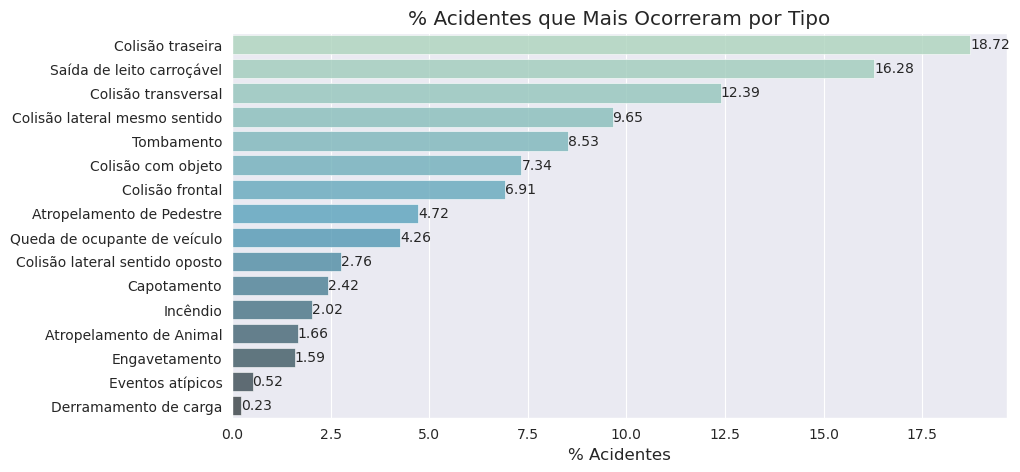

In [21]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='% Acidentes', 
                 y=type_accidents.index,
                 data=df_type_accidents,
                 alpha=0.8, 
                 orient='h',
                 palette='GnBu_d')
plt.title('% Acidentes que Mais Ocorreram por Tipo')
plt.ylabel(None)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

"Colisão traseira" é o tipo de acidente que mais ocorreu em 2022 com 18.72%, logo depois vem "saída de pista" com 16.28% e "colisão transversal" com 12.39%.

### 2) Em quais rodovias ocorreram o maior número de acidentes?

In [22]:
br_group = df.groupby('br')['id'].count().sort_values(ascending=False).head(5)

list_index = []
list_values = []

for i in br_group.index:
    list_index.append(i)
    
for value in br_group.values:
    value = round((value/total_accidents) * 100, 2)
    list_values.append(value)
    
df_brs = pd.DataFrame({'% Acidentes': list_values}, index=list_index)

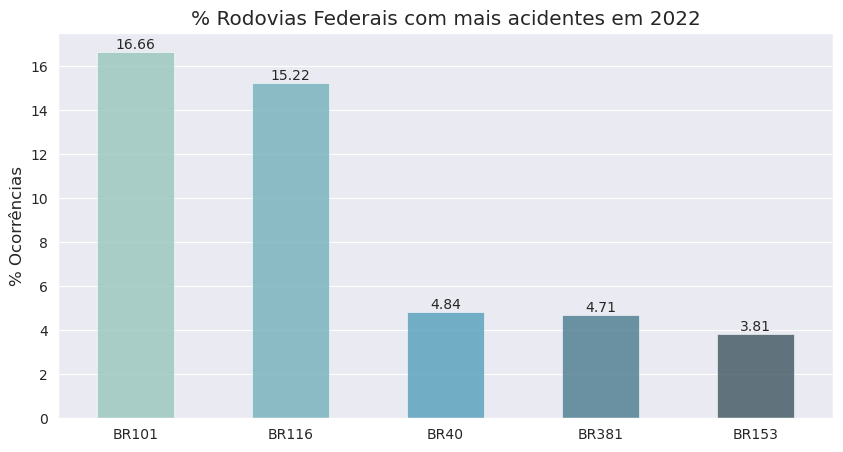

In [23]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df_brs.index, 
                 y='% Acidentes', 
                 data=df_brs, 
                 alpha=0.8,
                 palette='GnBu_d')
plt.title('% Rodovias Federais com mais acidentes em 2022')
plt.ylabel('% Ocorrências', fontsize=12)
plt.xlabel(None)

Width(ax,0.5)

for bars in ax.containers:
    ax.bar_label(bars)
       
plt.show()

As duas rodovias federais que mais ocorreram acidentes no ano de 2022 foi a BR101, resposnável por 16.71% do total de acidentes, e a BR116 resposnável por 15.26% dos acidentes. Em terceiro lugar, bem abaixo das duas primeiras, vem a BR40 resposnável por 4.85% do total de acidentes. 

### 3) Quais estados tiverem o maior número de acidentes?


In [24]:
uf_accidents = df['uf'].value_counts(normalize=True)

# Arredondando valores e criando Dataframe
list_values = []

for value in uf_accidents.values:
    value = round(value * 100, 2)
    list_values.append(value)
    
df_uf_accidents = pd.DataFrame({'% Acidentes': list_values}, uf_accidents.index)

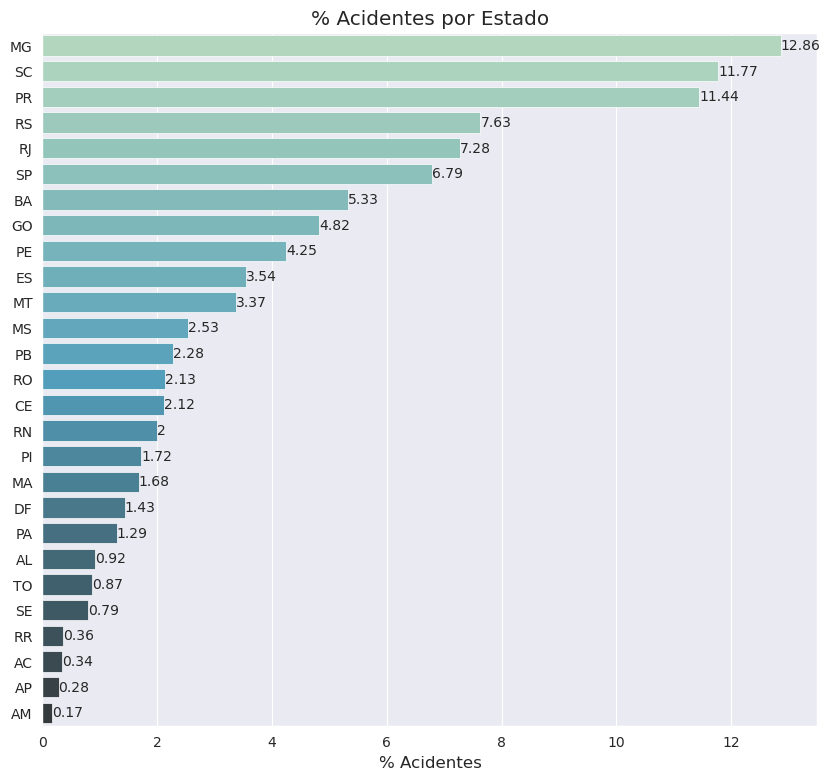

In [25]:
plt.figure(figsize=(10,9))
ax = sns.barplot(x='% Acidentes', 
                 y=uf_accidents.index, 
                 data=df_uf_accidents, 
                 palette='GnBu_d',
                 orient='h')
plt.title('% Acidentes por Estado')
plt.xlabel('% Acidentes')
plt.ylabel(None)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

O estado que mais apresentou acidentes em 2022 foi Minas Gerais, com 12.86% do total de acidentes. Em segundo lugar vem Santa Catarina com 11.77% e em terceiro o Paraná com 11.44% dos acidentes. Ou seja, os três estados juntos representaram mais de 36% do total de acidentes nas rodovias federais do Brasil em 2022.

### 4) Em qual mês do ano ocorreu o maior número de acidentes?

In [26]:
accidents_month = df['mes'].value_counts(normalize=True)[df['mes'].unique()]

# Arredondando os valores e criando dataframe
list_values = []

for value in accidents_month.values:
    value = round((value * 100), 2)
    list_values.append(value)

df_accidents_month = pd.DataFrame({'Mes': accidents_month.index, 'Acidentes': list_values})

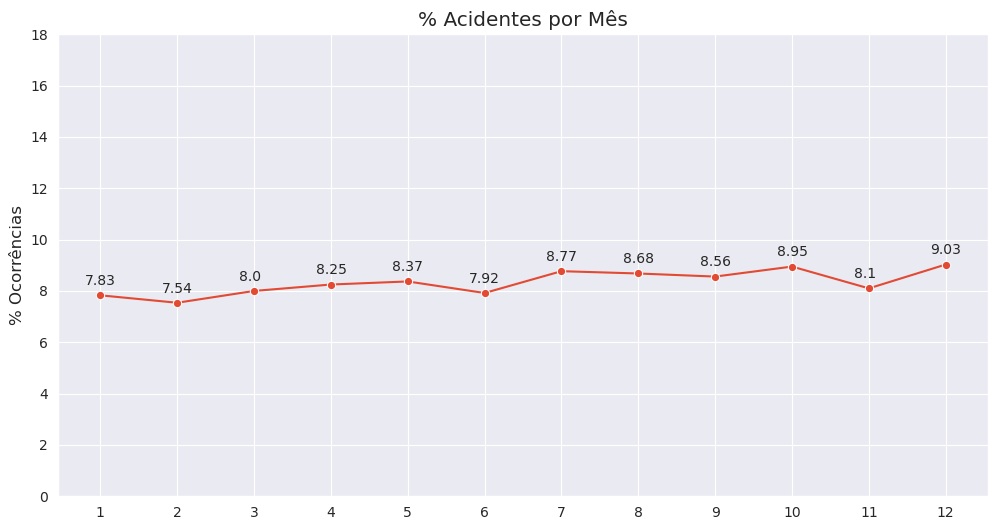

In [27]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(x='Mes', 
             y='Acidentes', 
             data=df_accidents_month,
             markers=True,
             marker = 'o')
plt.title('% Acidentes por Mês')
plt.xlabel(None)
plt.ylabel('% Ocorrências', fontsize=12)
plt.yticks(range(0, 20, 2))
plt.xticks(range(1, 13, 1))

values = list_values

for i,values in enumerate(values):
    plt.annotate(values, (df_accidents_month['Mes'][i]-0.2, df_accidents_month['Acidentes'][i]+0.4))
        
plt.show()

Os valores são semelhantes em todos os meses, não tendo nenhum mês que se destaque negativamente muito acima dos demais em números de acidentes. O mês que mais ocorreu acidentes foi Dezembro, com 9.03% das ocorrências, sendo que Fevereiro foi o mês com o menor número de ocorrências, tendo 7.54%. O que vale destacar é que nítidamente ocorre mais acidentes no segundo semestre em comparação com o primeiro. 

### 5) Qual dia e horário ocorrem a maior parte dos acidentes?


In [28]:
accidents_day = df.groupby('dia_semana')['id'].count().sort_values(ascending=False)

# Transformando valores em porcentagem e criando Dataframe
list_values = []
    
for value in accidents_day.values:
    value = round((value/total_accidents) * 100, 2)
    list_values.append(value)
    
df_accidents_day = pd.DataFrame({'% Acidentes': list_values}, index=accidents_day.index)

In [29]:
accidents_time = df['horario'].value_counts(normalize=True).head()

# Arredondando os valores e criando dataframe
list_values = []

for value in accidents_time.values:
    value = round((value * 100), 2)
    list_values.append(value)
    
df_accidents_time = pd.DataFrame({'% Acidentes': list_values}, index=accidents_time.index)

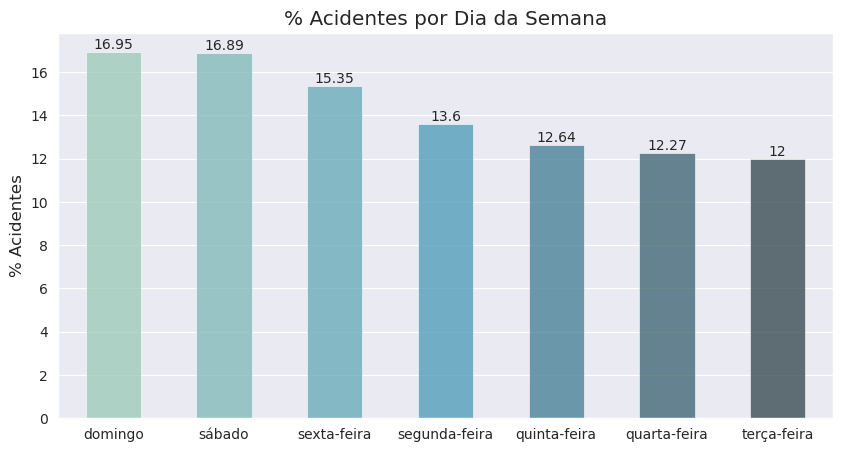

In [30]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df_accidents_day.index, 
                 y='% Acidentes', 
                 data=df_accidents_day, 
                 alpha=0.8,
                 palette='GnBu_d')
plt.title('% Acidentes por Dia da Semana')
plt.ylabel('% Acidentes')
plt.xlabel(None)

Width(ax, 0.5)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

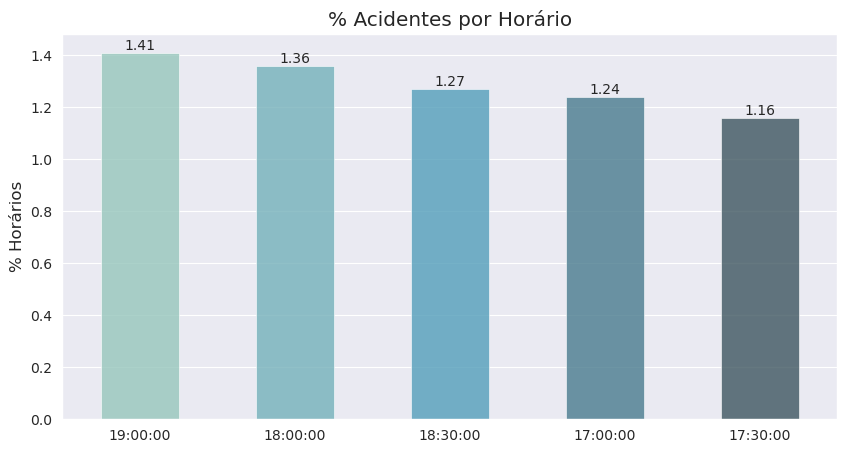

In [31]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df_accidents_time.index, 
                 y='% Acidentes', 
                 data=df_accidents_time, 
                 alpha=0.8,
                 palette='GnBu_d')
plt.title('% Acidentes por Horário')
plt.ylabel('% Horários')

Width(ax, 0.5)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

Os dias que mais ocorrem acidentes são nos domingos com 17% do total dos acidentes, nos sábados com 16.94% dos acidentes e nas sextas-feiras com 15.4%. Ou seja, estes três dias representam quase 50% dos acidentes. Com relação aos horários que mais ocorrem os acidentes, se destaca o intervalo entre as 17:00 e as 19:30.

### 6) Quais causas geraram maior número de acidentes?


In [32]:
cause_accidents = df['causa_acidente'].value_counts(normalize=True).head(10)

# Arredondando valores e criando Dataframe
list_values = []

for value in cause_accidents.values:
    value = round((value * 100), 2)
    list_values.append(value)
    
df_cause_accidents = pd.DataFrame({'% Acidentes': list_values}, cause_accidents.index)

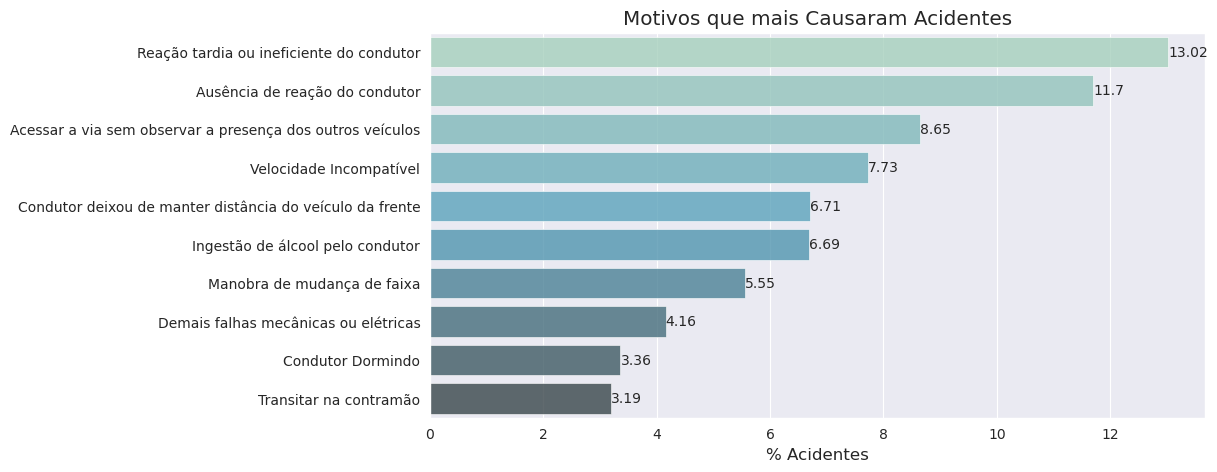

In [33]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='% Acidentes', 
                 y=cause_accidents.index, 
                 data=df_cause_accidents, 
                 alpha=0.8, 
                 orient='h',
                 palette='GnBu_d')
plt.title('Motivos que mais Causaram Acidentes');
plt.ylabel(None);

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

A maior causa de acidentes segundo os dados foi "Reação tardeia ou inefeciente do condutor" com 13%. É importante destacar que "falhas mecânicas ou elétricas aparece apenas na oitava posição com um pouco mais de 4%. Todas as demais causas entre as dez primeiras estão relacionadas ao comportamento do condutor. 

### 7) Sobre quais condições climáticas ocorrem a maioria dos acidentes?


In [34]:
accidents_weather = df['condicao_metereologica'].value_counts(normalize=True).head(5)

# Arredondando valores e criando Dataframe
list_values = []

for value in accidents_weather.values:
    value = round((value * 100), 2)
    list_values.append(value)
    
df_accidents_weather = pd.DataFrame({'% Acidentes': list_values}, accidents_weather.index)

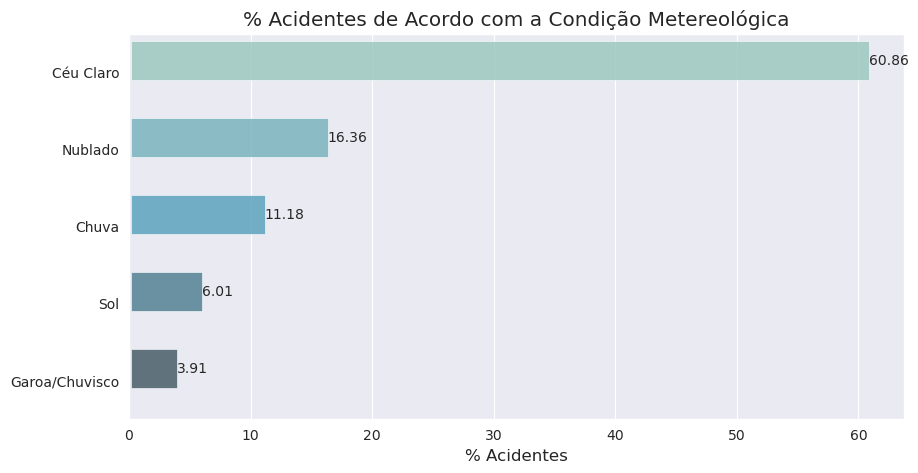

In [35]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = '% Acidentes',
                 y = df_accidents_weather.index,
                 data=df_accidents_weather,
                 alpha=0.8, 
                 orient='h',
                 palette='GnBu_d')
plt.title('% Acidentes de Acordo com a Condição Metereológica')
plt.xlabel('% Acidentes')
plt.ylabel(None)

Height(ax, 0.5)

for bars in ax.containers:
    ax.bar_label(bars)    
    
plt.show()

Acidentes com o céu claro predominam, 60.71% dos acidentes ocorrem sobre esta condição. Depois vem a condição "nublado" com 16.21% e "chuva" com 11.03%.

### 8) Sob quais tipos de pista ocorrem a maioria dos acidentes?

In [36]:
accidents_track = df['tipo_pista'].value_counts(normalize=True)

# Arredondando valores e criando Dataframe
list_values = []

for value in accidents_track.values:
    value = round((value * 100), 2)
    list_values.append(value)
    
df_accidents_track = pd.DataFrame({'% Acidentes': list_values}, accidents_track.index)

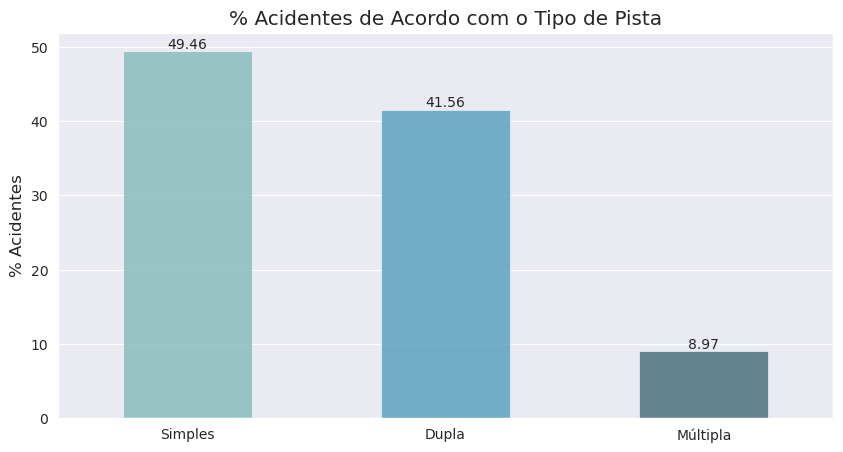

In [37]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=accidents_track.index, 
                 y='% Acidentes', 
                 data=df_accidents_track, 
                 alpha=0.8,
                 palette='GnBu_d')
plt.title('% Acidentes de Acordo com o Tipo de Pista')
plt.xlabel(None)
plt.ylabel('% Acidentes')

Width(ax, 0.5)

for bars in ax.containers:
    ax.bar_label(bars)    

plt.show()

Quase 50% dos acidentes ocorrem em pistas simples, e pistas duplas são resposnáveis por 41.56% dos acidentes.

### 9) Qual a porcentagem de mortos com relação ao número de pessoas acidentadas?


In [38]:
deaths_accidents = round((total_deaths/total_accidents_people)*100, 2)
print(f'A porcentagem de vítimas fatais com relação ao número de acidentes foi de {deaths_accidents}%')

A porcentagem de vítimas fatais com relação ao número de acidentes foi de 3.5%


### 10) Quais tipos de acidentes com vítimas fatais mais ocorreram?


In [39]:
type_accidents_deaths = df.groupby('tipo_acidente')['mortos'].sum().sort_values(ascending=False).head()

# Transformando valores em porcentagem e criando Dataframe
list_values = []
    
for value in type_accidents_deaths.values:
    value = round((value/total_deaths) * 100, 2)
    list_values.append(value)
    
df_type_accidents_deaths = pd.DataFrame({'% Acidentes': list_values}, index=type_accidents_deaths.index)

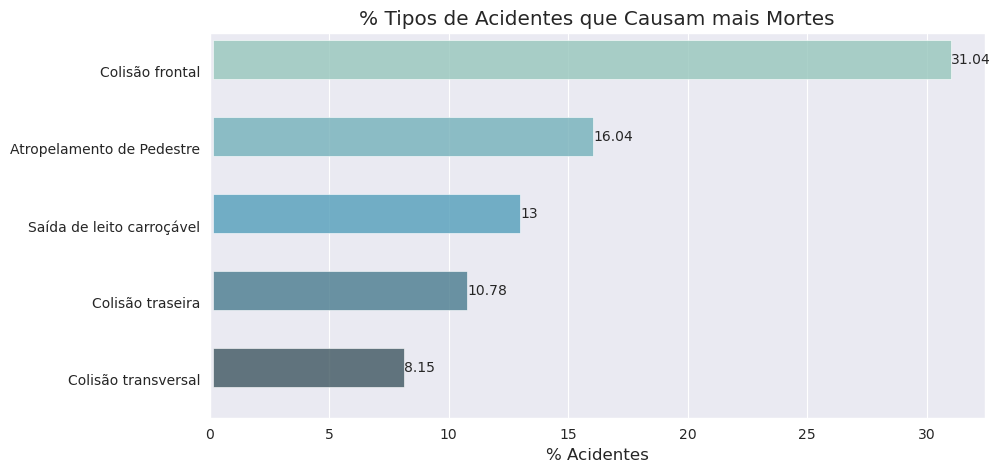

In [40]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='% Acidentes', 
                 y=df_type_accidents_deaths.index,
                 data=df_type_accidents_deaths,
                 alpha=0.8, 
                 orient='h',
                 palette='GnBu_d')
plt.title('% Tipos de Acidentes que Causam mais Mortes')
plt.ylabel(None)

Height(ax, 0.5)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

Com mais de 30%, "colisão frontal" é o tipo de acidente que causou mais mortes nas rodovias federais em 2022. Em seguinda vem "atropelamento de pedestre" com 16.05% e "saída de pista" com 13.01%. 

### 11) Em quais rodovias ocorreram o maior número de acidentes com vítimas fatais?

In [41]:
deaths_BR = df.groupby('br').agg({'mortos':['sum']})
deaths_BR = deaths_BR['mortos'].sort_values('sum', ascending=False).head().reset_index()

# Criando um dataframe com os valores em porcentagem
list_index = []
list_values = []

for i in deaths_BR['br']:
    list_index.append(i)

for value in deaths_BR['sum']:
    value = round((value/total_deaths) * 100, 2)
    list_values.append(value)
    
df_deaths_BR = pd.DataFrame({'vitimas_fatais': list_values}, index=list_index)

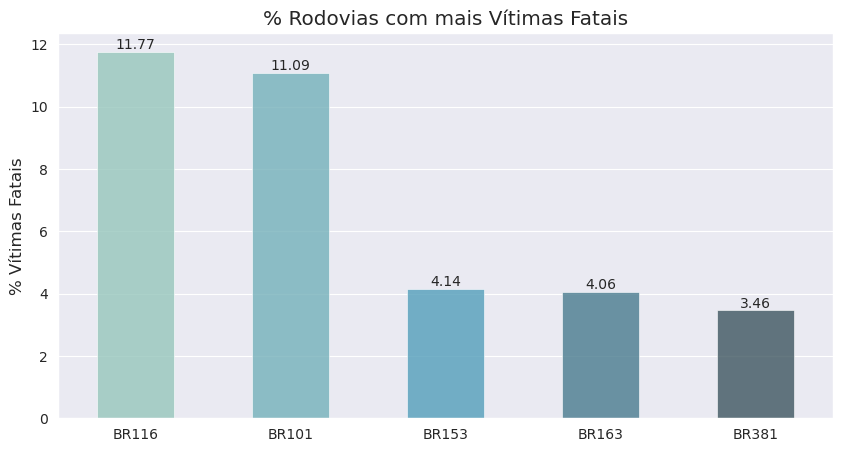

In [42]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df_deaths_BR.index, 
                 y='vitimas_fatais', 
                 data=df_deaths_BR,
                 alpha=0.8,
                 palette='GnBu_d')
plt.title('% Rodovias com mais Vítimas Fatais')
plt.xlabel(None)
plt.ylabel('% Vítimas Fatais')

Width(ax, 0.5)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Assim como quando analisamos o número de acidentes totais por BR, a BR116 e a BR101 se destacam negativamente também no número de ocorrências com vítimas fatais. As duas lideram, sendo cada uma delas resposnável por mais de 11% dos totais de acidentes com mortes. Em terceiro lugar vem a BR153 com um pouco mais de 4%.

### 12) Quais estados tiveram o maior número de acidentes com vítimas fatais?


In [43]:
accidents_deaths_uf = df.groupby('uf')['mortos'].sum().sort_values(ascending=False)
   
list_values = []
for value in accidents_deaths_uf.values:
    value = round((value/total_deaths)*100, 2)
    list_values.append(value)
    
df_accidents_deaths_uf = pd.DataFrame({'% Acidentes': list_values}, accidents_deaths_uf.index)

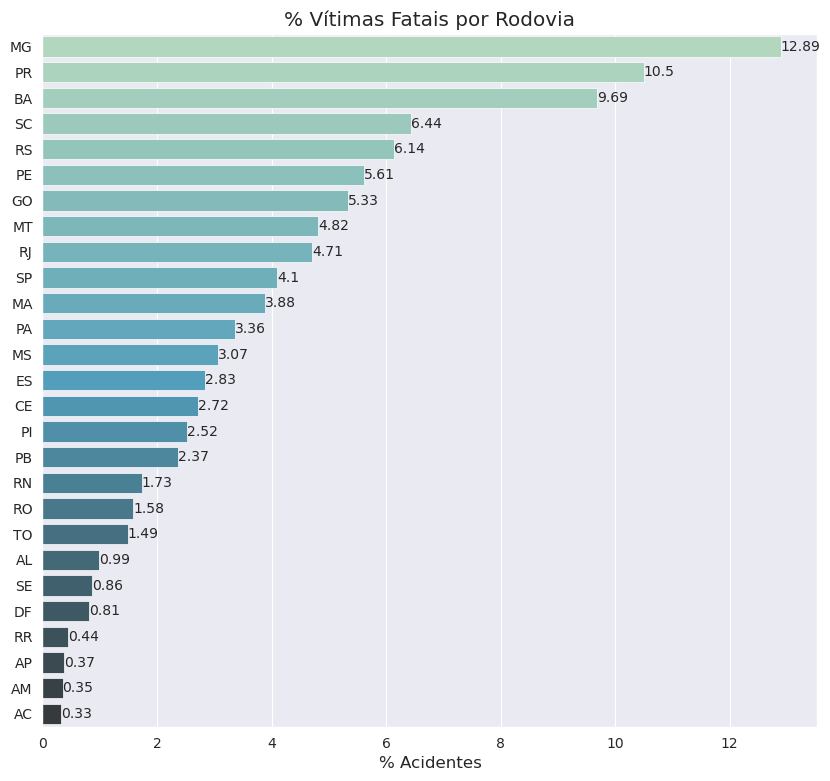

In [44]:
plt.figure(figsize=(10,9))
ax = sns.barplot(x = '% Acidentes', 
                 y=df_accidents_deaths_uf.index, 
                 data=df_accidents_deaths_uf, 
                 label="Total",
                 palette='GnBu_d',
                 orient='h')
plt.title('% Vítimas Fatais por Rodovia')
plt.xlabel('% Acidentes')
plt.ylabel(None);

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

Com 12.9% do total de vítimas fatais, Minas Gerais também é estado que lidera neste quesito. Em segundo lugar vem a Bahia com 9.7% e Santa Catarina em terceiro com 6.44%

### 13) Em qual mês do ano ocorreu o maior número de acidentes com vítimas fatais?

In [45]:
deaths_month = df.groupby('mes')['mortos'].sum()

list_values = []
    
for value in deaths_month.values:
    value = round((value / total_deaths) * 100, 2)
    list_values.append(value)
    
df_deaths_month = pd.DataFrame({'Mes': deaths_month.index, 'vitimas_fatais': list_values})

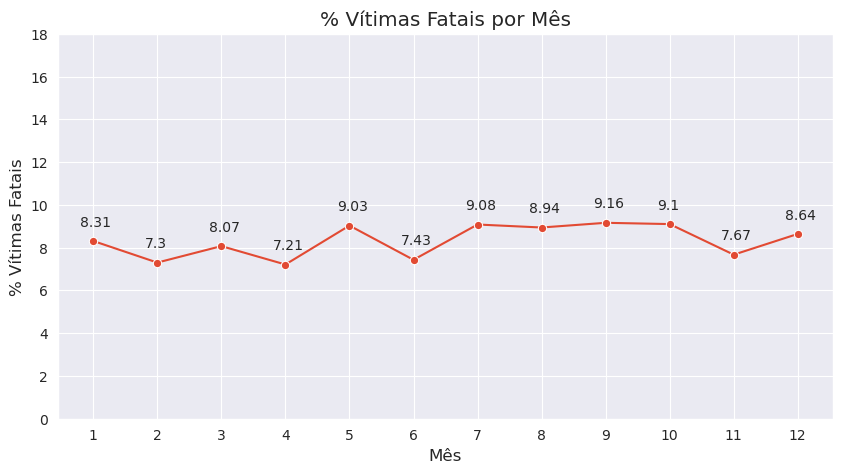

In [46]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Mes', 
             y='vitimas_fatais', 
             data=df_deaths_month,
             marker='o')
plt.title('% Vítimas Fatais por Mês')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('% Vítimas Fatais', fontsize=12)
plt.yticks(range(0, 20, 2))
plt.xticks(range(1, 13, 1))

values = list_values

for i,values in enumerate(values):
    plt.annotate(values, (df_deaths_month['Mes'][i]-0.2, df_deaths_month['vitimas_fatais'][i]+0.7))
    
plt.show()

Assim como na análise de acidentes totais por mês,os números de acidentes com vítimias fatais por mês também são muito semelhantes entre todos os meses. Os meses de maio, julho, setembro e outubro se destacam negativamente, tendo cada um deles mais de 9% dos acidentes com vítimas fatais. Aqui também fica claro, que no segundo semestre temos um aumento do número de acidentes com vítimas fatais.

### 14) Qual dia e horário da semana ocorrem a maior parte dos acidentes com vítimias fatais?


In [47]:
deaths_day = df.groupby('dia_semana')['mortos'].sum().sort_values(ascending=False)

# Transformando os valores em porcentagem e criando Dataframe
list_values = []
    
for value in deaths_day.values:
    value = round((value / total_deaths) * 100, 2)
    list_values.append(value)
    
df_deaths_day = pd.DataFrame({'vitimas_fatais': list_values}, deaths_day.index)

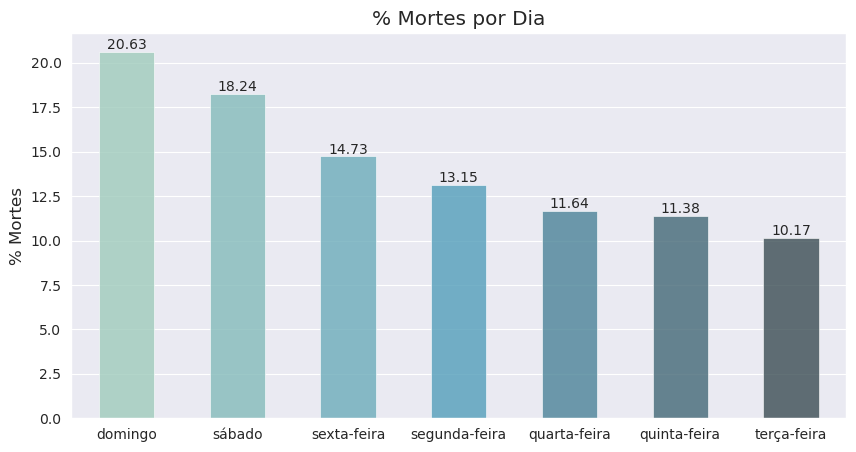

In [48]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df_deaths_day.index,
                 y='vitimas_fatais',
                 data=df_deaths_day,
                 alpha=0.8,
                 palette='GnBu_d')
plt.title('% Mortes por Dia')
plt.ylabel('% Mortes')
plt.xlabel(None)

Width(ax, 0.5)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

In [49]:
deaths_time = df.groupby('horario')['mortos'].sum().sort_values(ascending=False).head()

# Transformando valores em porcentagem e criando Dataframe
list_values = []
    
for value in deaths_time.values:
    value = round((value/total_deaths) * 100, 2)
    list_values.append(value)
    
df_deaths_time = pd.DataFrame({'vitimas_fatais': list_values}, index=deaths_time.index)

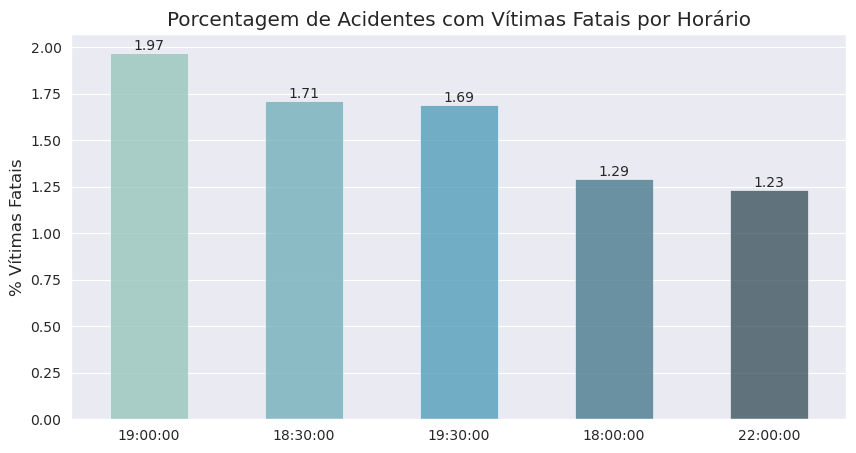

In [51]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x=df_deaths_time.index,  
                 y='vitimas_fatais', 
                 data=df_deaths_time, 
                 alpha=0.8,
                 palette='GnBu_d')
plt.title('Porcentagem de Acidentes com Vítimas Fatais por Horário')
plt.ylabel('% Vítimas Fatais')
plt.xlabel(None)

Width(ax, 0.5)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

Com 20.64% dos acidentes com vítimas fatais, o domingo lidera o dia semana com mais mortes. Vindo depois o sábado com 18.25% e a sexta-feira com 14.74%. Ou seja, os três dias juntos concentram mais de 53% dos acidentes com morte. Com relaão aos horários, entre as 18:00 até as 20:00 horas é o intervalo onde se encontra um maior volume de acidentes com morte.

### 15) Quais causas geraram maior número de acidentes com vítimias fatais?


In [52]:
cause_accidents_deaths = df.groupby('causa_acidente')['mortos'].sum().sort_values(ascending=False).head(5)

# Transformando valores em porcentagem e criando Dataframe
list_values = []
    
for value in cause_accidents_deaths.values:
    value = round((value / total_deaths) * 100, 2)
    list_values.append(value)
    
df_cause_accidents_deaths = pd.DataFrame({'% Acidentes': list_values}, index=cause_accidents_deaths.index)

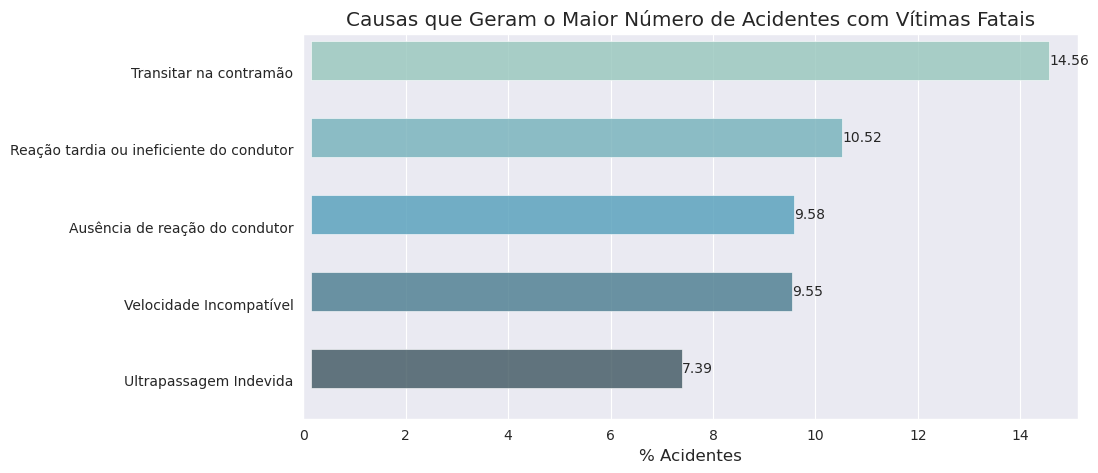

In [53]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='% Acidentes', 
                 y=cause_accidents_deaths.index,
                 data=df_cause_accidents_deaths, 
                 alpha=0.8, 
                 orient='h',
                 palette='GnBu_d')
plt.title('Causas que Geram o Maior Número de Acidentes com Vítimas Fatais')
plt.ylabel(None)

Height(ax, 0.5)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

"Transitar na contramão" apesar de representar apenas 3% dos acidentes totais nas rodovias federais, quando nos referimos a acidentes com mortes, é a principal causa, com 14.56% do total de acidentes com vítimas fatais.

## Conclusões 

- A cada 100 pessoas que se envolvem em um acidente em rodovias federais no Brasil em 2022, mais de 3 perderam a vida.
- As rodovias BR116 e BR101 foram as que mais registraram acidentes no geral e as que mais registraram acidentes com vítimas fatais.
- Colisão traseira foi o tipo de acidente que mais ocorreu em 2022, mas colisão frontal foi o maior responsável por acidentes com vítimas fatais.
- Reação tardia ou ineficiente do condutor é a causa que mais gerou acidentes em 2022.
- Transitar na contramão aparece apenas em 10º lugar quando nos referimos a causas que geraram acidentes no geral, mas é a primeira quando nos referimos a acidentes com vítimas fatais.
- Quase metade do total de acidentes ocorreram em pistas simples;
- Grande parte dos acidentes com vítimas fatais ou não, ocorreram entre e os intervalos de sexta-feira até segunda-feira, com maior destaque para os sábados e domingos.
- Grande parte dos acidentes com vítimas fatais ou não, ocorreram dentro de um intervalo de horário entre as 17:00 até as 20:00.


## Recomendações

- Se aprofundar na análise dos motivos que levam a BR116 e a BR101 a serem as rodovias com o maior número de acidentes e com maior número de mortes. São as duas maiores rodovias em extensão no Brasil, mas será que apenas isso justifica?
- Quando analisamos as causas que mais geraram acidentes, fica muito claro que grande parte delas está vinculada ao comportamento do motorista. Políticas de conscientização, maiores penalizações e melhores fiscalizações podem ser medidas que auxiliem na diminuição destes números.
- Como colisão frontal é a causa que mais gerou mortes nas rodovias federais em 2022, quando associamos ao dado que quase metade dos acidentes ocorreram em pistas simples, podemos ter un insight que investimentos em duplicações das rodovias podem auxiliar na diminuição do número de acidentes com vítimas fatais.
- Que as autoridades resposnáveis pelas rodovias federais se organizem da melhor maneira possível para prestar o melhor socorro possível para as vítimas de acidentes, principalmente nos finais de semana e a partir das 17:00, intervalos de dias e horários que mais ocorrem acidentes. 